#### 데이터 분석

- 문제 정의 = 요금과 생존률이 관계가 있는가?
- 가설 설정 = 요금과 생존의 상관관계 / 탑승 등급과 생존의 상관관계
- 데이터 분석 기본 세팅
- 데이터 분석
- 분석 결과 시각화
- 최종 결론 = 요금이 생존에 영향을 미쳤다기 보다 요금이 탑승 등급을 결정하기 때문에 간적접으로 생존률과 관련이 있다

#### 좋은 가설이란?

- 풀고자 하는 문제의 방향성과 일치하는 가설 → 무슨 문제를 풀고자 하는지 명확히 알 것
- 테스트 가능한 가설 → 데이터로 확인이 가능한 가설을 세울 것
- 액션으로 이어질 수 있는 가설 → 가설 검증 후 결과에 따라 특정 액션으로 유도될 수 있을 것

In [1]:
# Pandas 라이브러리 불러오기

import pandas as pd

# 타이타닉 파일 불러오기
# 엑셀파일 불러오기
# titanic = pd.read_excel('파일이름.xlsx',engine='openpyxl')

titanic = pd.read_csv('../Data/train.csv',sep=',')
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,3,0,35.0,0,0,8.0500,0


In [2]:
# 컬럼이름 변경

titanic.columns = ['탑승자 ID', '탑승등급', '성별', '나이', '형제 자매 수', '함께 탑승한 부모 또는 자녀의 수', '요금', '생존유무']
titanic.head()

,탑승자 ID,탑승등급,성별,나이,형제 자매 수,함께 탑승한 부모 또는 자녀의 수,요금,생존유무
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,3,0,35.0,0,0,8.0500,0


In [3]:
# 데이터 클렌징
# 데이터 결측치 확인

print(titanic.isnull().sum())

탑승자 ID                  0
탑승등급                    0
성별                      0
나이                    177
형제 자매 수                 0
함께 탑승한 부모 또는 자녀의 수      0
요금                      0
생존유무                    0
dtype: int64


In [4]:
# 데이터 결측치 제거

titanic = titanic.dropna()
print(titanic.isnull().sum())

탑승자 ID                0
탑승등급                  0
성별                    0
나이                    0
형제 자매 수               0
함께 탑승한 부모 또는 자녀의 수    0
요금                    0
생존유무                  0
dtype: int64


In [5]:
# 상관관계 분석
# 음수, 양수와 상관 없이 숫자가 클수록 상관 관계가 큰 것
# 상관계수가 0에 가까울수록 관계가 없음
# 양수 = 한 변수가 증가함에 따라 다른 변수도 증가하는 경향을 보이는 것
# 음수 = 한 변수의 수치가 증가할 때 다른 변수는 감소하는 경향을 보이는 것

corr=titanic.corr(method='pearson')
corr

,탑승자 ID,탑승등급,성별,나이,형제 자매 수,함께 탑승한 부모 또는 자녀의 수,요금,생존유무
탑승자 ID,1.000000,-0.035349,-0.024575,0.036847,-0.082398,-0.011617,0.009592,0.029340
탑승등급,-0.035349,1.000000,-0.155460,-0.369226,0.067247,0.025683,-0.554182,-0.359653
성별,-0.024575,-0.155460,1.000000,-0.093254,0.103950,0.246972,0.184994,0.538826
나이,0.036847,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.077221
형제 자매 수,-0.082398,0.067247,0.103950,-0.308247,1.000000,0.383820,0.138329,-0.017358
함께 탑승한 부모 또는 자녀의 수,-0.011617,0.025683,0.246972,-0.189119,0.383820,1.000000,0.205119,0.093317
요금,0.009592,-0.554182,0.184994,0.096067,0.138329,0.205119,1.000000,0.268189
생존유무,0.029340,-0.359653,0.538826,-0.077221,-0.017358,0.093317,0.268189,1.000000


In [6]:
# Survived가 제외된 상관관계

corr=corr[corr.생존유무 !=1]
corr

,탑승자 ID,탑승등급,성별,나이,형제 자매 수,함께 탑승한 부모 또는 자녀의 수,요금,생존유무
탑승자 ID,1.000000,-0.035349,-0.024575,0.036847,-0.082398,-0.011617,0.009592,0.029340
탑승등급,-0.035349,1.000000,-0.155460,-0.369226,0.067247,0.025683,-0.554182,-0.359653
성별,-0.024575,-0.155460,1.000000,-0.093254,0.103950,0.246972,0.184994,0.538826
나이,0.036847,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.077221
형제 자매 수,-0.082398,0.067247,0.103950,-0.308247,1.000000,0.383820,0.138329,-0.017358
함께 탑승한 부모 또는 자녀의 수,-0.011617,0.025683,0.246972,-0.189119,0.383820,1.000000,0.205119,0.093317
요금,0.009592,-0.554182,0.184994,0.096067,0.138329,0.205119,1.000000,0.268189


<Axes: >

C:\Users\still\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\still\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


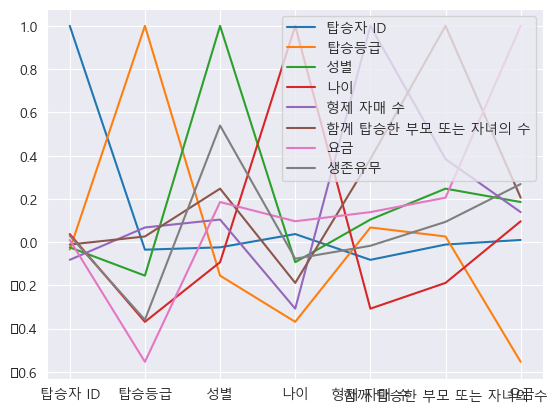

In [7]:
# 데이터 시각화 라이브러리 불러오기
# 상관관계 시각화

import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

corr.plot()

<Axes: >

C:\Users\still\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\still\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


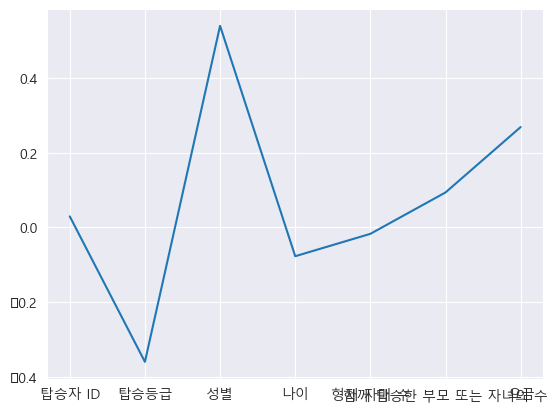

In [8]:
# Survived 상관관계 시각화

corr['생존유무'].plot()

<Axes: >

C:\Users\still\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\still\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


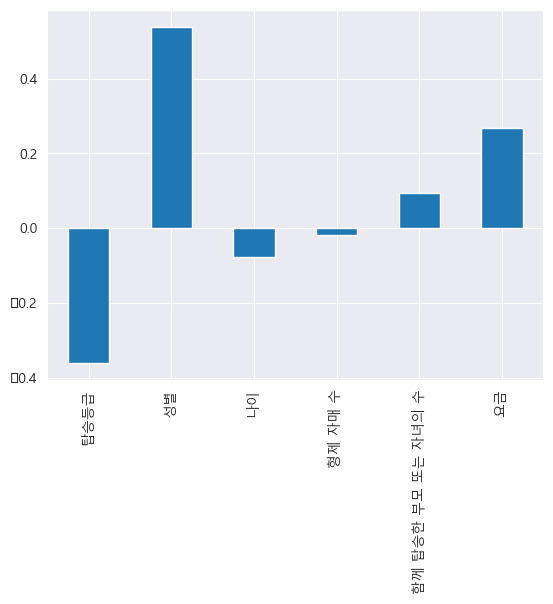

In [9]:
# 필요없는 상관관계 passengerid  삭제

corr = corr.drop(['탑승자 ID'], axis ='rows')
corr['생존유무'].plot.bar()

In [10]:
# 데이터 연산 라이브러리 불러오기
# 시각화 라이브러리 불러오기

import numpy as np
import seaborn as sns
plt.rc('font',family='Malgun Gothic')

titanic = pd.read_table('../Data/train.csv',sep=',')
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,3,0,35.0,0,0,8.0500,0


In [11]:
# 컬럼이름 변경

titanic.columns = ['탑승자 ID', '탑승등급', '성별', '나이', '형제 자매 수', '함께 탑승한 부모 또는 자녀의 수', '요금', '생존유무']
titanic.head()

,탑승자 ID,탑승등급,성별,나이,형제 자매 수,함께 탑승한 부모 또는 자녀의 수,요금,생존유무
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,3,0,35.0,0,0,8.0500,0


In [12]:
# 데이터 결측치 확인
# 데이터 결측치 제거

titanic = titanic.dropna()
print(titanic.isnull().sum())

탑승자 ID                0
탑승등급                  0
성별                    0
나이                    0
형제 자매 수               0
함께 탑승한 부모 또는 자녀의 수    0
요금                    0
생존유무                  0
dtype: int64


In [13]:
# 나이 통계 확인

titanic.describe()

,탑승자 ID,탑승등급,성별,나이,형제 자매 수,함께 탑승한 부모 또는 자녀의 수,요금,생존유무
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514,0.406162
std,259.119524,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930,0.491460
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700,0.000000
75%,677.750000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,891.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000


<Axes: >

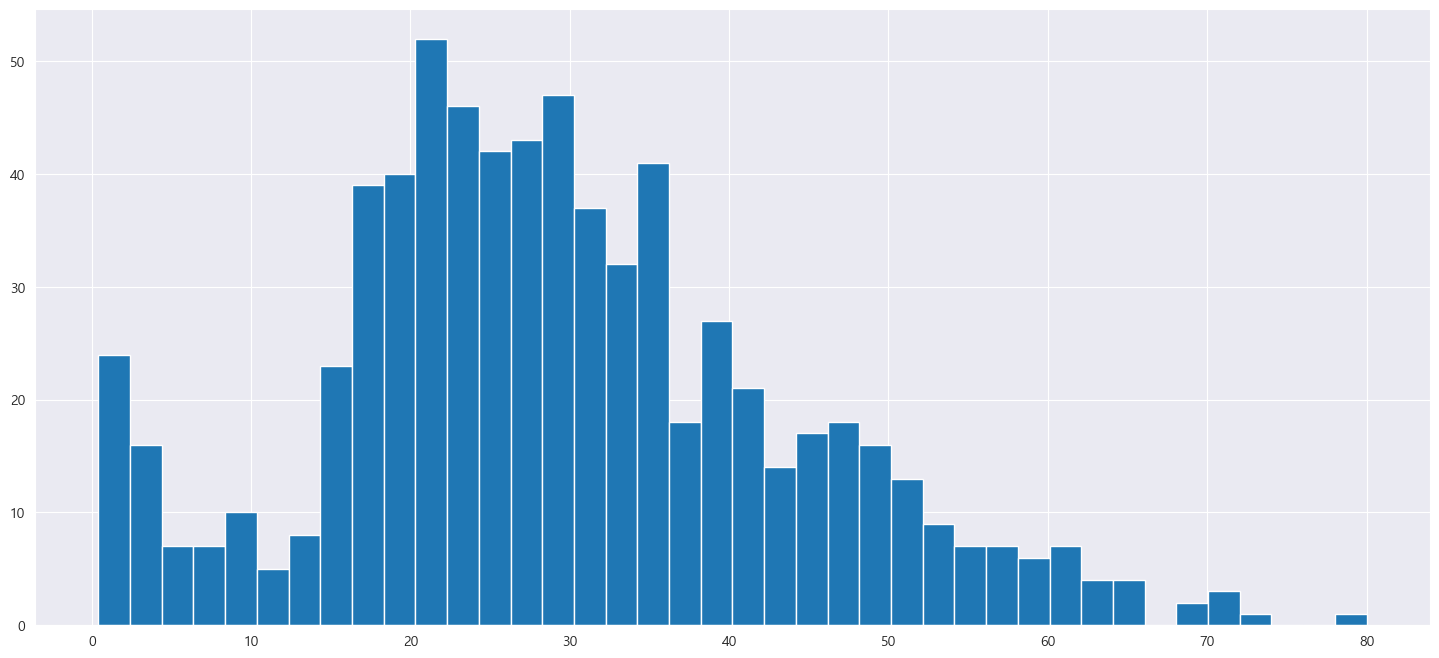

In [14]:
# 나이별 히스토그램

titanic['나이'].hist(bins=40,figsize=(18,8),grid=True)

In [15]:
# 나이별 라벨링 및 각 나이별 생존율 확인

titanic['Age_cat'] = pd.cut(titanic['나이'],bins=[0,3,7,15,30,60,100],include_lowest=True,labels=['baby','children','teenage','young','adult','old'])

# 연령대 기준으로 그룹화하여 평균 값 확인

titanic.groupby('Age_cat').mean()

,탑승자 ID,탑승등급,성별,나이,형제 자매 수,함께 탑승한 부모 또는 자녀의 수,요금,생존유무
Age_cat,,,,,,,,
baby,396.700000,2.533333,0.400000,1.672333,1.733333,1.366667,33.364307,0.666667
children,466.700000,2.650000,0.600000,4.950000,1.750000,1.350000,27.905830,0.700000
teenage,442.060606,2.696970,0.575758,11.500000,1.727273,1.121212,35.217430,0.454545
young,435.058282,2.426380,0.352761,23.262270,0.355828,0.263804,28.015413,0.358896
adult,470.388693,1.954064,0.353357,41.132509,0.363958,0.392226,42.429225,0.420495
old,432.545455,1.590909,0.136364,66.022727,0.136364,0.272727,41.371214,0.227273


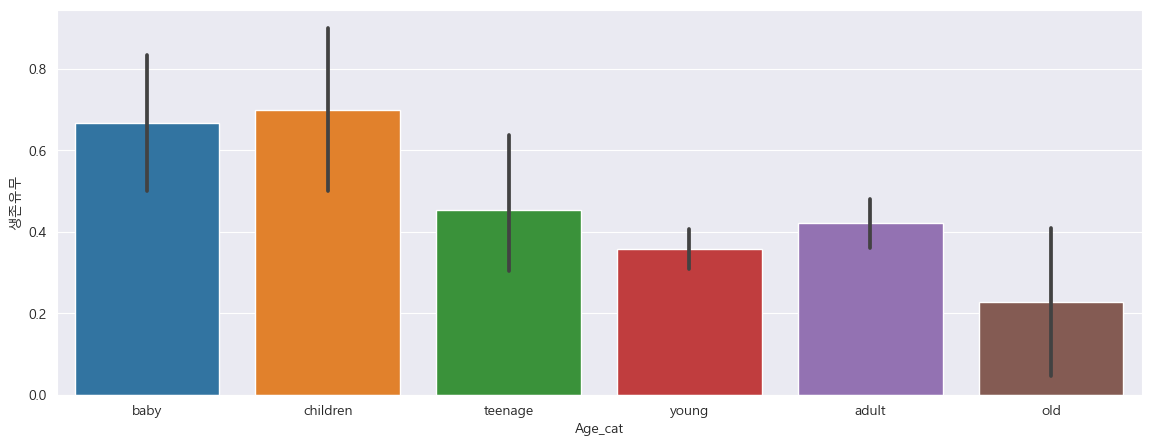

In [16]:
# 그래프 크기 설정

plt.figure(figsize=(14,5))

# 바 그래프 그리기 (x축 = Age_cat, y축 = Survived)

sns.barplot(x='Age_cat',y='생존유무',data=titanic)

# 그래프 나타내기

plt.show()